In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [3]:
import os
import sys

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [4]:
from data.pdb_utils import VOCAB

In [5]:
def get_distances(indexes, embeddings, distance_metric="euclidean", num_pairs=500):
    pairs = [random.sample(indexes, 2) for _ in range(num_pairs)]
    distances = []
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        if distance_metric == "euclidean":
            dist = np.linalg.norm(emb1 - emb2)
        elif distance_metric == "cosine":
            dist = np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))
        else:
            raise ValueError("Invalid distance metric")
        distances.append(dist)
    distances = np.array(distances)
    return distances

# Residue embeddings

## Pretrained

In [6]:
embedding_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/BioLiP/data_pretrained"

In [7]:
with open(f"{embedding_dir}/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open(f"{embedding_dir}/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [8]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.136,1.889088e-04
1,ALA,0.088,4.158608e-02
2,VAL,0.098,1.637913e-02
3,LEU,0.144,6.125193e-05
4,ILE,0.104,8.922221e-03
5,PHE,0.108,5.832083e-03
6,TRP,0.088,4.158608e-02
7,TYR,0.108,5.832083e-03
8,ASP,0.108,5.832083e-03
9,HIS,0.180,1.714405e-07


In [10]:
aa_type = 12

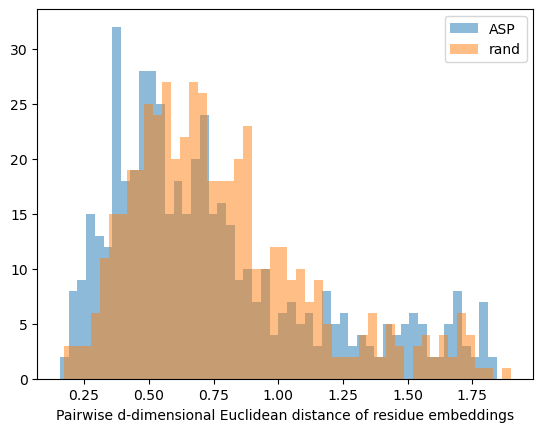

In [11]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


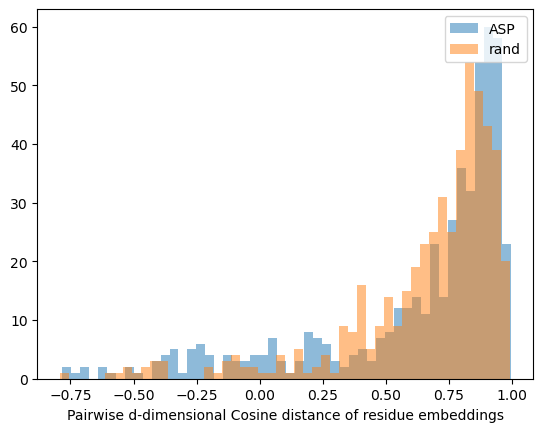

In [12]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


## Finetuned

In [20]:
embedding_dir1 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/PLA30/data_finetuned"

In [21]:
with open(f"{embedding_dir1}/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open(f"{embedding_dir1}/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [17]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.102,1.096897e-02
1,ALA,0.066,2.263473e-01
2,VAL,0.126,7.045192e-04
3,LEU,0.090,3.479508e-02
4,ILE,0.086,4.950261e-02
5,PHE,0.080,8.150167e-02
6,TRP,0.066,2.263473e-01
7,TYR,0.094,2.406615e-02
8,ASP,0.118,1.876975e-03
9,HIS,0.120,1.478118e-03


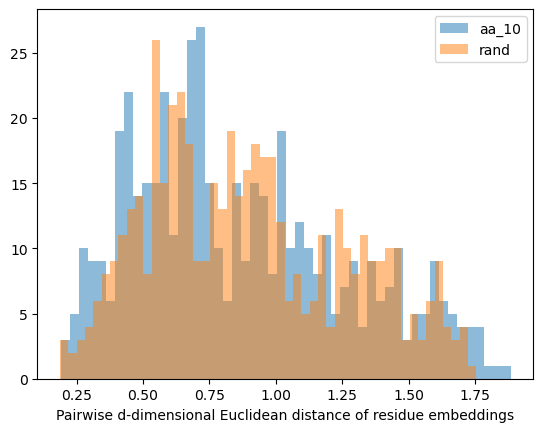

In [18]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


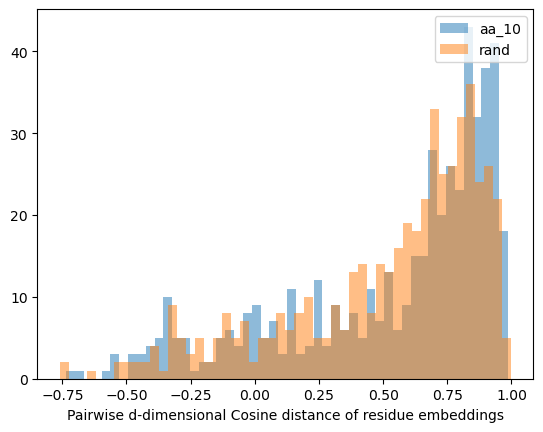

In [19]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()

# Atom embeddings

## Pretrained

In [22]:
with open(f"{embedding_dir}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open(f"{embedding_dir}/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [23]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.108,0.005832
1,N,0.19,0.0
2,O,0.038,0.863677
3,F,0.39,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,0.97,0.0
6,P,0.682,0.0
7,S,0.03,0.97825
8,Cl,0.54,0.0
9,K,not enough atoms,not enough atoms


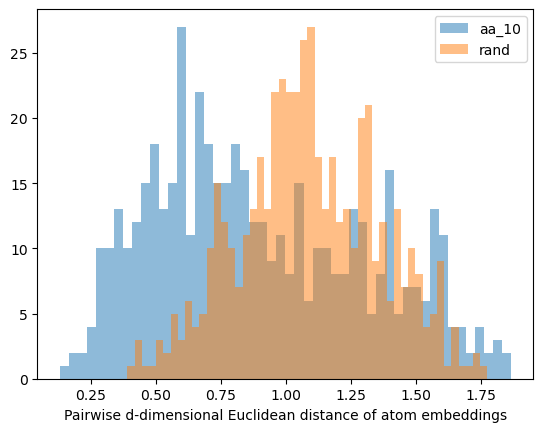

In [24]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

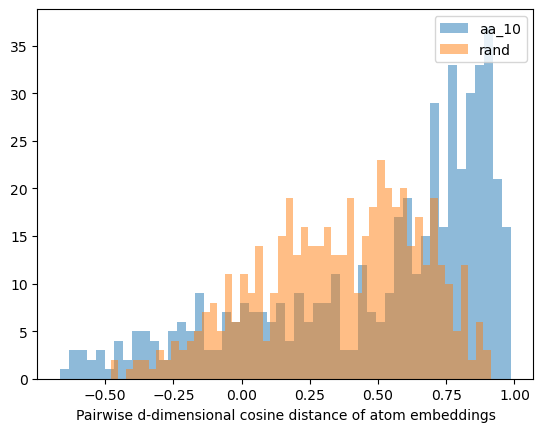

In [25]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

## Finetuned

In [26]:
with open(f"{embedding_dir1}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open(f"{embedding_dir1}/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [27]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.088,0.041586
1,N,0.146,0.000046
2,O,0.04,0.819151
3,F,0.388,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,0.97,0.0
6,P,0.594,0.0
7,S,0.052,0.508917
8,Cl,0.482,0.0
9,K,not enough atoms,not enough atoms


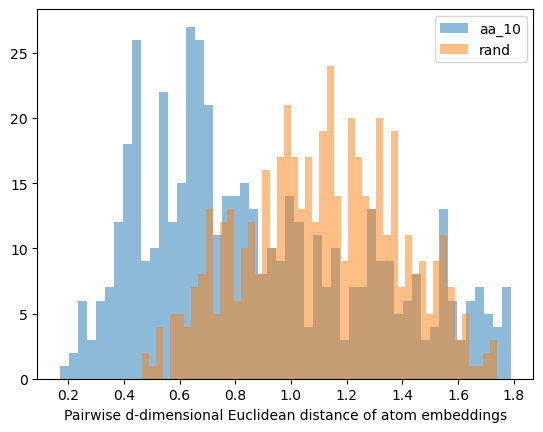

In [28]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

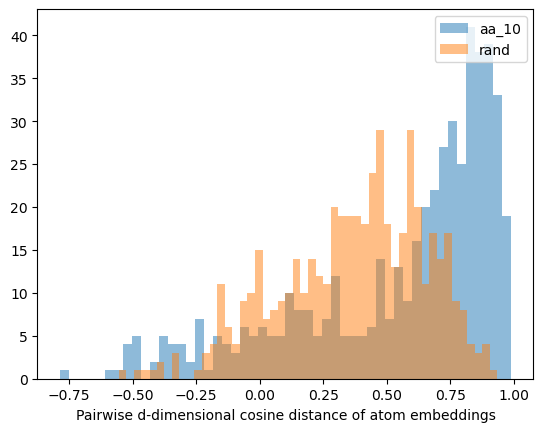

In [29]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()